In [199]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import cycler

plt.style.use('fivethirtyeight')

In [200]:
params = plt.rcParams.copy()

for param in params:
    if 'wspace' in param:
        print(param)

figure.constrained_layout.wspace
figure.subplot.wspace


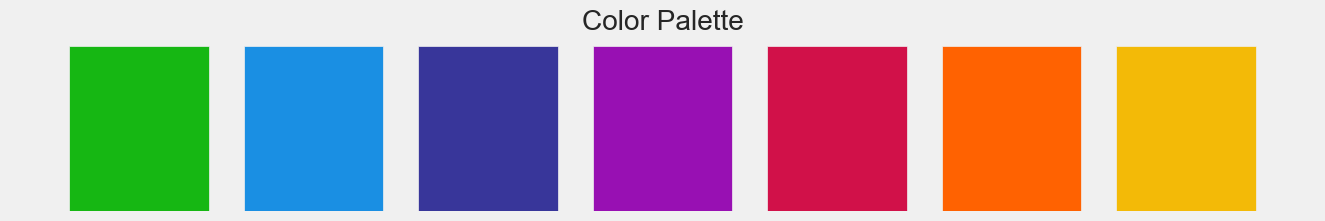

In [202]:
colors = ['#16b713','#1A8FE3','#38369A','#9810B3','#D11149','#FF6201','#f3ba07']
ncolors = len(colors)
plt.figure(figsize=(15,15/ncolors))
plt.bar(range(ncolors),1,color=colors)
plt.axis(False)
plt.title('Color Palette')
plt.show()

In [219]:
colors = ['#16b713','#1A8FE3','#38369A','#9810B3','#D11149','#FF6201','#f3ba07']
plt.rc('axes',prop_cycle=cycler('color',colors))

In [220]:
# plt.rcParams['axes.prop_cycle'] = cycler('color',colors)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.subplot.hspace'] = 0.4

In [218]:
plt.rcParams['axes.prop_cycle']

"(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)"
"(0.8666666666666667, 0.5176470588235295, 0.3215686274509804)"
"(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)"
"(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)"
"(0.5058823529411764, 0.4470588235294118, 0.7019607843137254)"
"(0.5764705882352941, 0.47058823529411764, 0.3764705882352941)"
"(0.8549019607843137, 0.5450980392156862, 0.7647058823529411)"
"(0.5490196078431373, 0.5490196078431373, 0.5490196078431373)"
"(0.8, 0.7254901960784313, 0.4549019607843137)"
"(0.39215686274509803, 0.7098039215686275, 0.803921568627451)"


In [204]:
df = pd.read_csv('../data/cleaned.csv')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             359 non-null    object 
 1   contest_num      359 non-null    int64  
 2   word             359 non-null    object 
 3   num_results      359 non-null    int64  
 4   num_hardmode     359 non-null    int64  
 5   in1              359 non-null    int64  
 6   in2              359 non-null    int64  
 7   in3              359 non-null    int64  
 8   in4              359 non-null    int64  
 9   in5              359 non-null    int64  
 10  in6              359 non-null    int64  
 11  over6            359 non-null    int64  
 12  letter1          359 non-null    object 
 13  letter2          359 non-null    object 
 14  letter3          359 non-null    object 
 15  letter4          359 non-null    object 
 16  letter5          359 non-null    object 
 17  letter1_int     

In [206]:
df['date'] = pd.to_datetime(df.date)

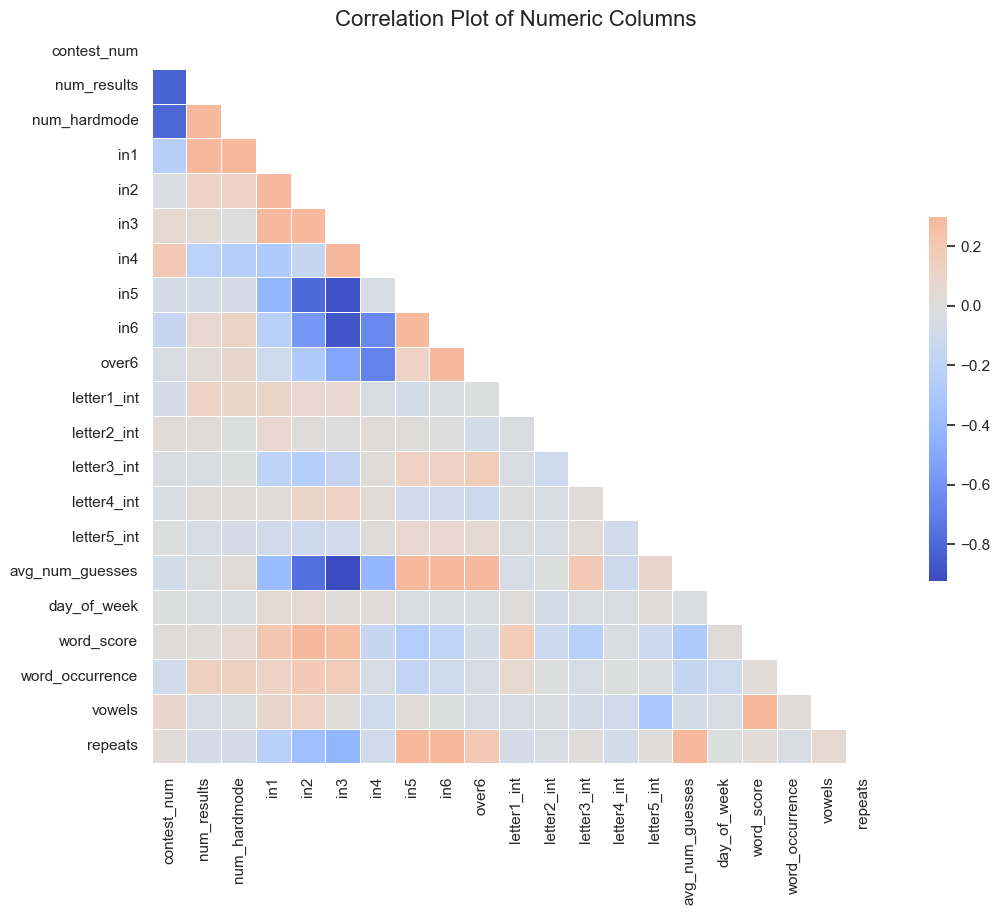

In [207]:
sns.set_theme(style="white")
corrplot = df.select_dtypes(include=np.number).corr()

mask = np.triu(np.ones_like(corrplot, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrplot, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Plot of Numeric Columns',size=16)
plt.show()

# Part 1: Number of Daily Reported Results

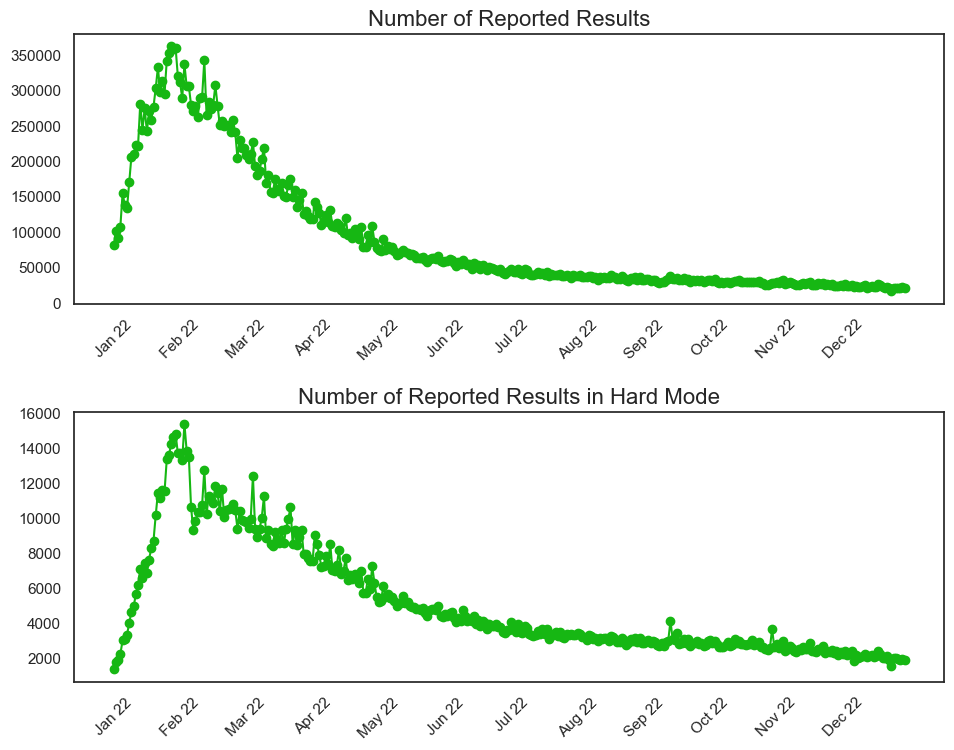

In [221]:
fig = plt.figure(figsize=(10,8))

dates = df.date
results = df.num_results
hardmode = df.num_hardmode
dateticks = dates[::30]
datelabs = [date.strftime('%b %y') for date in dates[::30]]

fig.add_subplot(211)
plt.title('Number of Reported Results')
plt.plot(dates,results,marker='o')
plt.xticks(dateticks,labels=datelabs,rotation=45)

fig.add_subplot(212)
plt.title('Number of Reported Results in Hard Mode')
plt.plot(dates,hardmode,marker='o')
plt.xticks(dateticks,labels=datelabs,rotation=45)

plt.show()

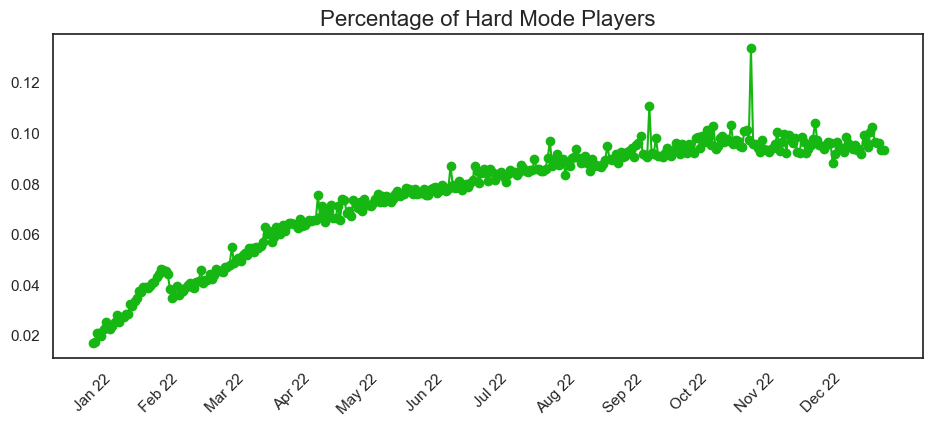

In [222]:
percent_hard = df.num_hardmode/df.num_results

fig = plt.figure(figsize=(10,4))

plt.title('Percentage of Hard Mode Players')
plt.plot(dates,percent_hard,marker='o')
plt.xticks(dateticks,labels=datelabs,rotation=45)

plt.show()

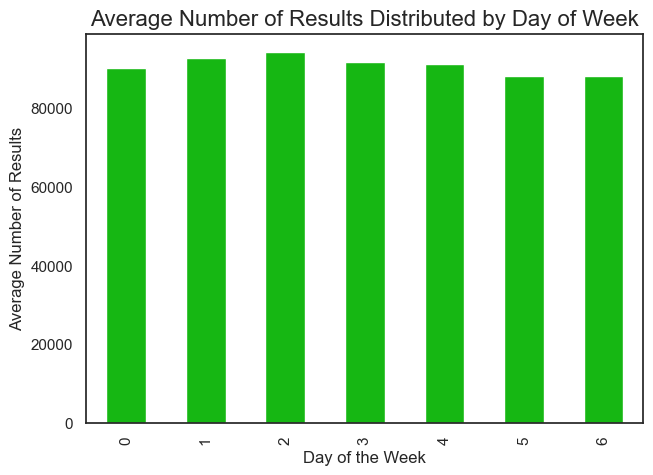

In [223]:
grouped = df.groupby('day_of_week')['num_results'].mean()

# Plot a bar chart with the grouped data
grouped.plot(kind='bar')

# Add labels and title to the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Results')
plt.title('Average Number of Results Distributed by Day of Week')
plt.show()

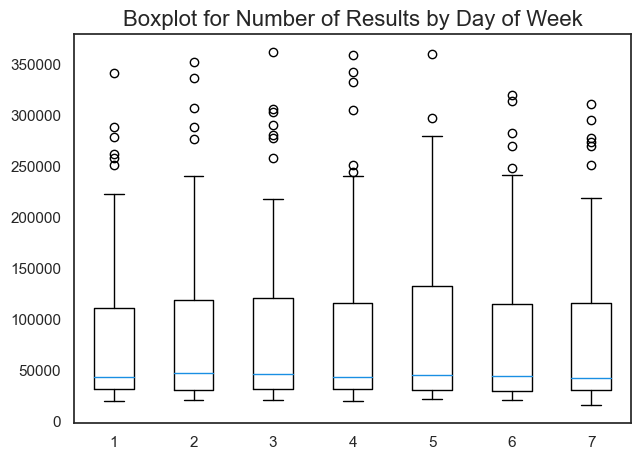

In [224]:
boxplot_data = []
for i in range(7):
    boxplot_data.append(df[df.day_of_week == i].num_results)

plt.boxplot(boxplot_data)
plt.title('Boxplot for Number of Results by Day of Week')
plt.show()

# Part 2: Distribution of Reported Results

In [225]:
distribution_cols = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']
distribution = df[distribution_cols]

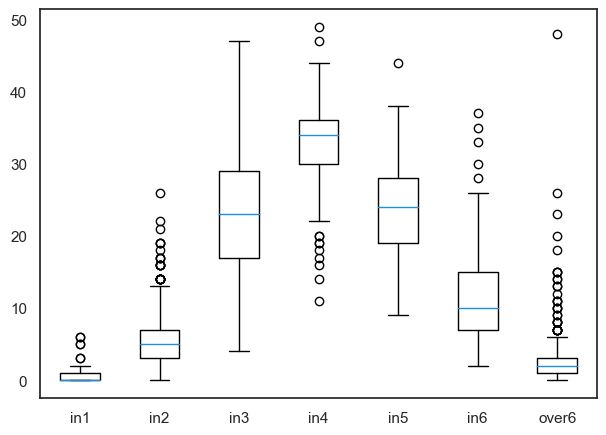

In [236]:
plt.boxplot(distribution)
plt.xticks(range(1,8),labels=distribution_cols)
plt.show()

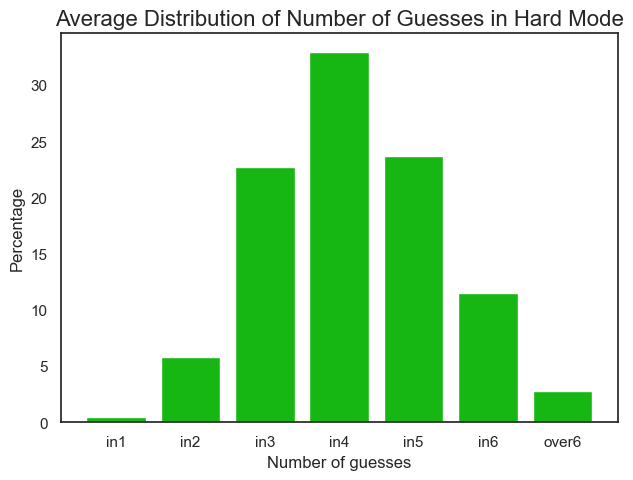

In [237]:
plt.bar(distribution_cols, distribution.mean(axis=0))

plt.xlabel('Number of guesses')
plt.ylabel('Percentage')

plt.title('Average Distribution of Number of Guesses in Hard Mode')
plt.show()

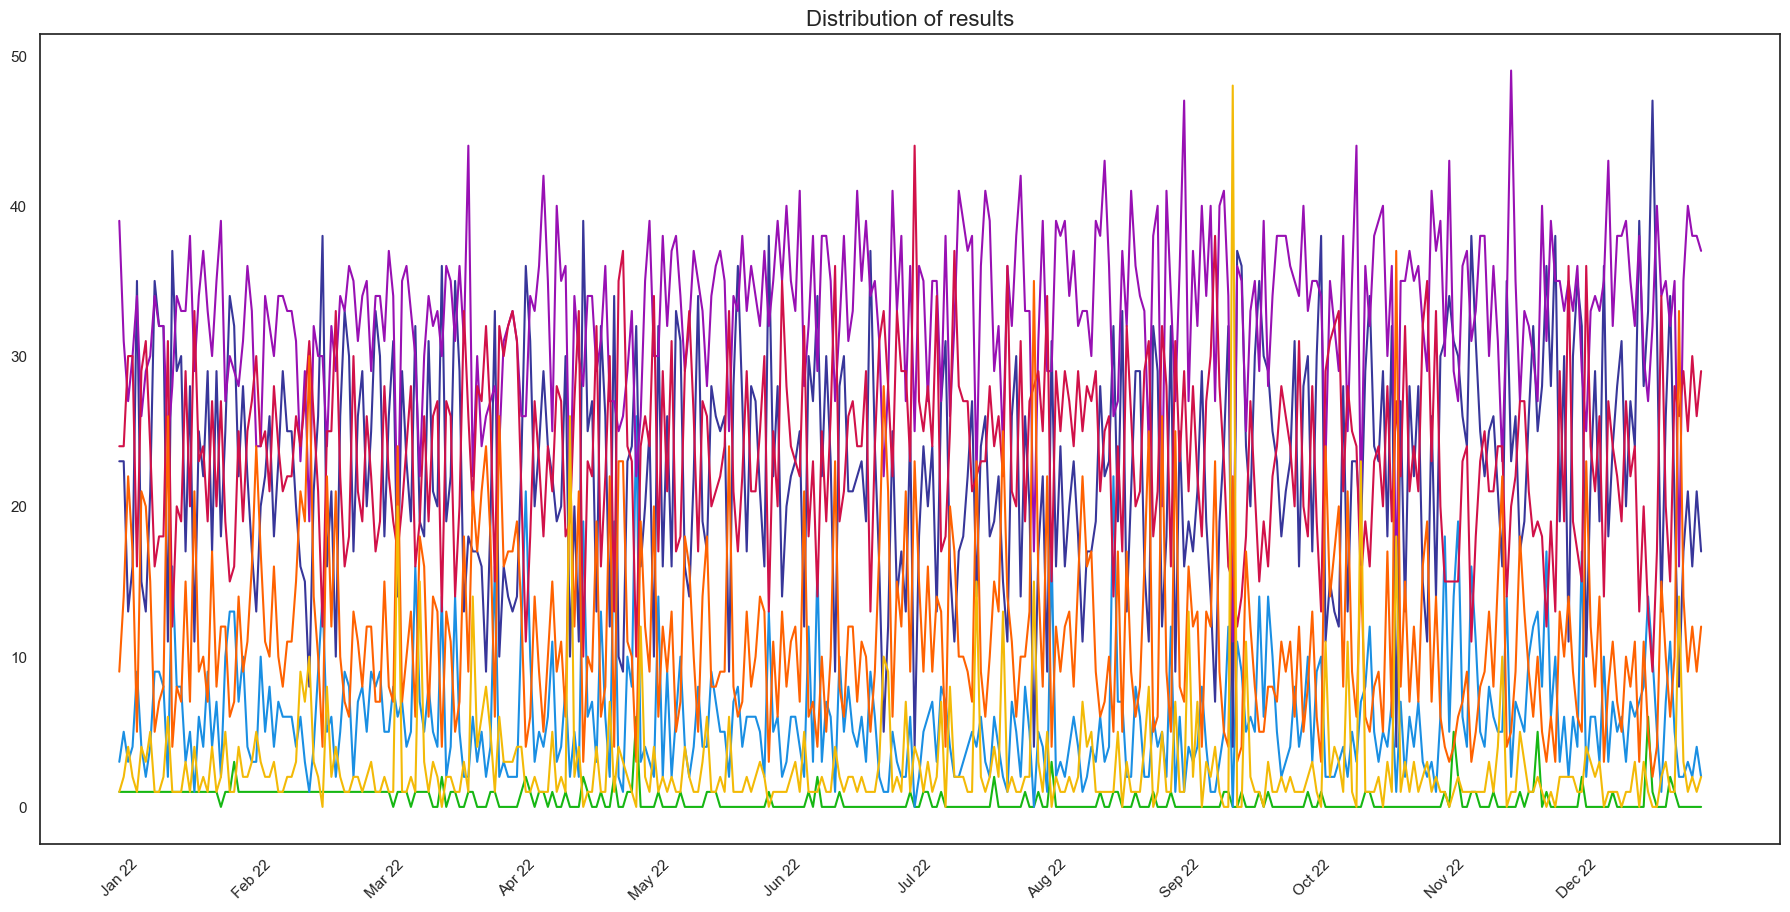

In [278]:
plt.figure(figsize=(20,10))
plt.plot(dates,distribution)
plt.title('Distribution of results')
plt.xticks(dateticks,labels=datelabs,rotation=45)
plt.show()

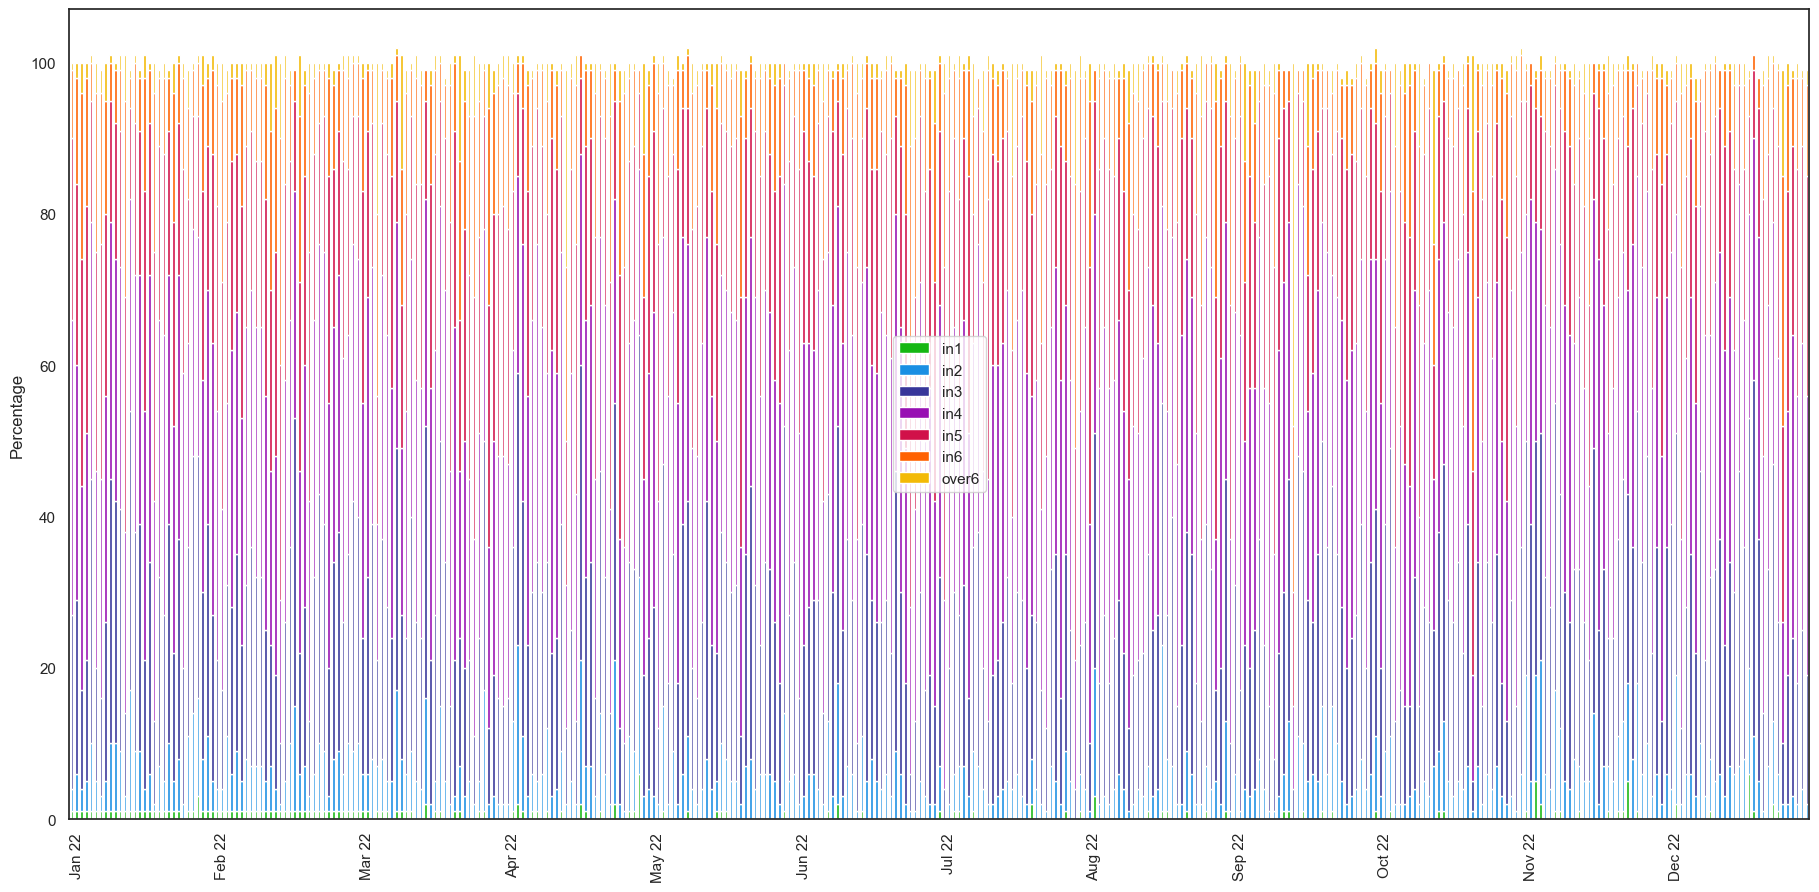

In [241]:
distribution.plot(kind='bar', stacked=True, figsize=(20, 10))

plt.ylabel('Percentage')
plt.xticks(range(1,350,30),labels=datelabs)

plt.show()

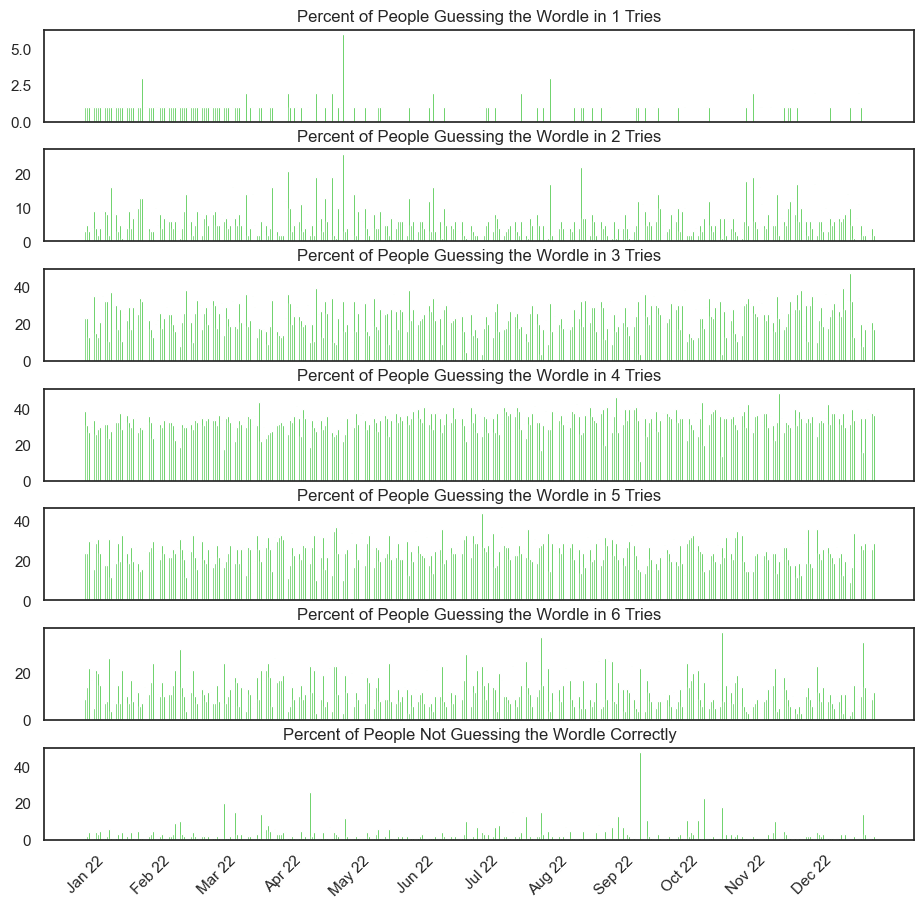

In [271]:
fig = plt.figure(figsize=(10,10))


for i, col in enumerate(distribution):
    fig.add_subplot(711+i)
    plt.bar(dates,df[col])
    if i == 6:
        plt.title(f'Percent of People Not Guessing the Wordle Correctly',fontsize=12)
    else:
        plt.title(f'Percent of People Guessing the Wordle in {i+1} Tries',fontsize=12)
    plt.xticks([],labels=[])
plt.xticks(dateticks,labels=datelabs,rotation=45)
plt.subplots_adjust(hspace=0.3)
plt.show()

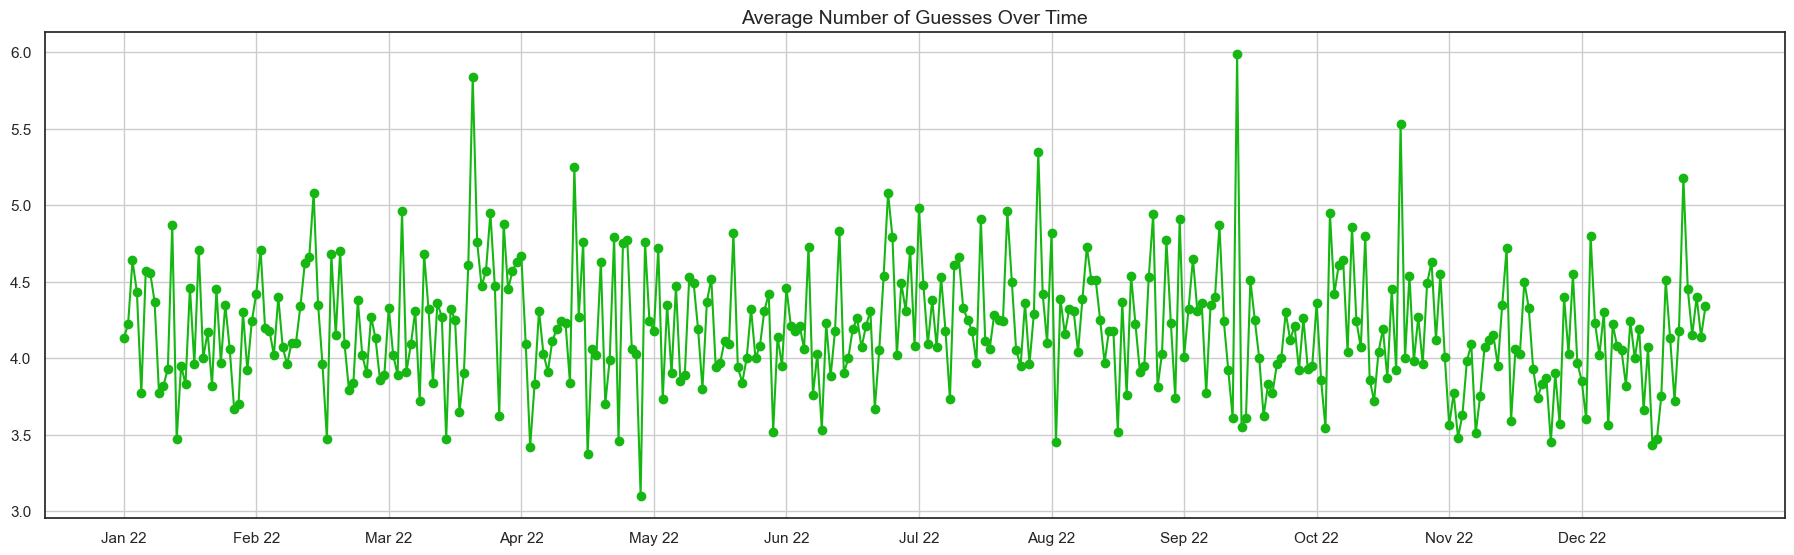

In [274]:
plt.figure(figsize=(20,6))

plt.plot(df['date'], df['avg_num_guesses'], marker='o')
plt.title('Average Number of Guesses Over Time', fontsize=14)
plt.xticks(dateticks,datelabs)
plt.grid(True)
plt.show()

# Part 3: Classification by Difficulty

# Other Features